# **Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


# **Content**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



# 📚 Importing Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


# ⏳ Loading the dataset ⏳</span>



In [2]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# 🧠 Understanding of data 🧠

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 🧹 Data Cleaning 🧹

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.shape

(284807, 31)

In [7]:
df.duplicated().any()

True

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(283726, 31)

In [10]:
284807-275663 #no of duplicate values

9144

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 📊 Data  Visualization 📊

In [13]:
# Checking discriptive statistics of a data frame
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [14]:
#Checking Class distribution of target values
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [15]:
#checking percentge distribution of Normal and fraud
normal_transiction=df['Class'].value_counts()[0]/len(df['Class'])*100
fraud_transiction=normal=df['Class'].value_counts()[1]/len(df['Class'])*100
print("class 0 : " ,normal_transiction )
print("class 1 : " ,fraud_transiction )

class 0 :  99.83328986416473
class 1 :  0.1667101358352777


Text(0, 0.5, 'Frequency')

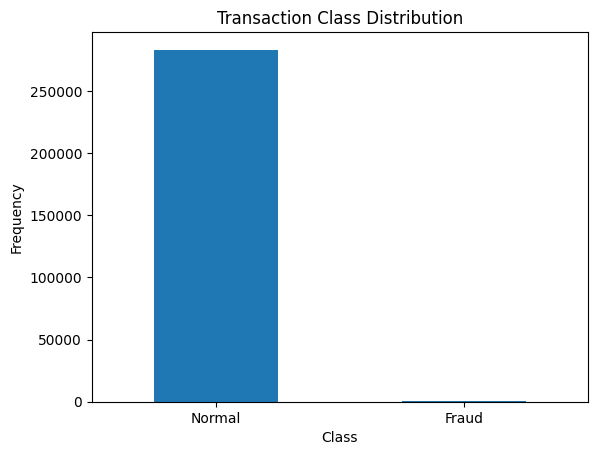

In [16]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2),LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [17]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]

In [18]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
normal.Amount.describe()


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

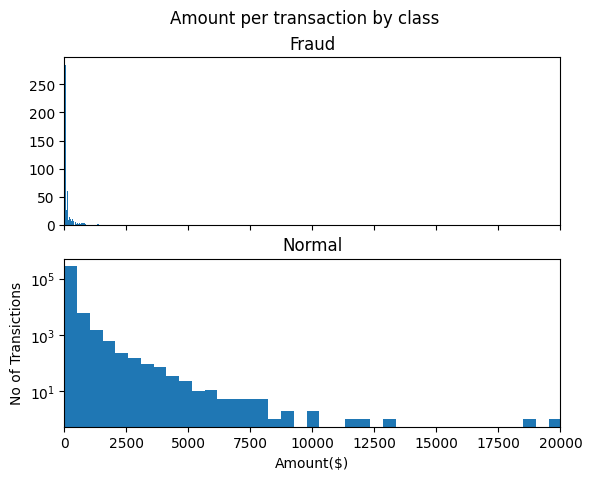

In [20]:
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True)
fig.suptitle('Amount per transaction by class')

ax[0].hist(fraud.Amount,bins=50)
ax[0].set_title('Fraud')

ax[1].hist(normal.Amount,bins=50)
ax[1].set_title('Normal')

plt.xlabel('Amount($)')
plt.ylabel('No of Transictions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

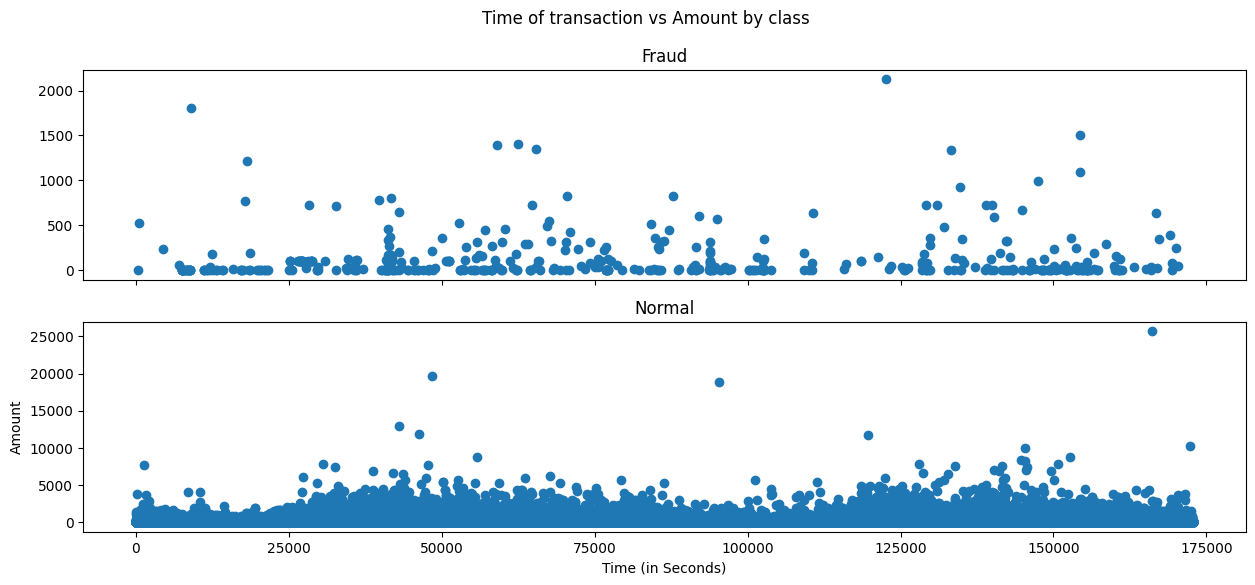

In [21]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

fig,ax = plt.subplots(2, 1, sharex=True,figsize=(15,6))
fig.suptitle('Time of transaction vs Amount by class')

ax[0].scatter(fraud.Time, fraud.Amount)
ax[0].set_title('Fraud')

ax[1].scatter(normal.Time, normal.Amount)
ax[1].set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


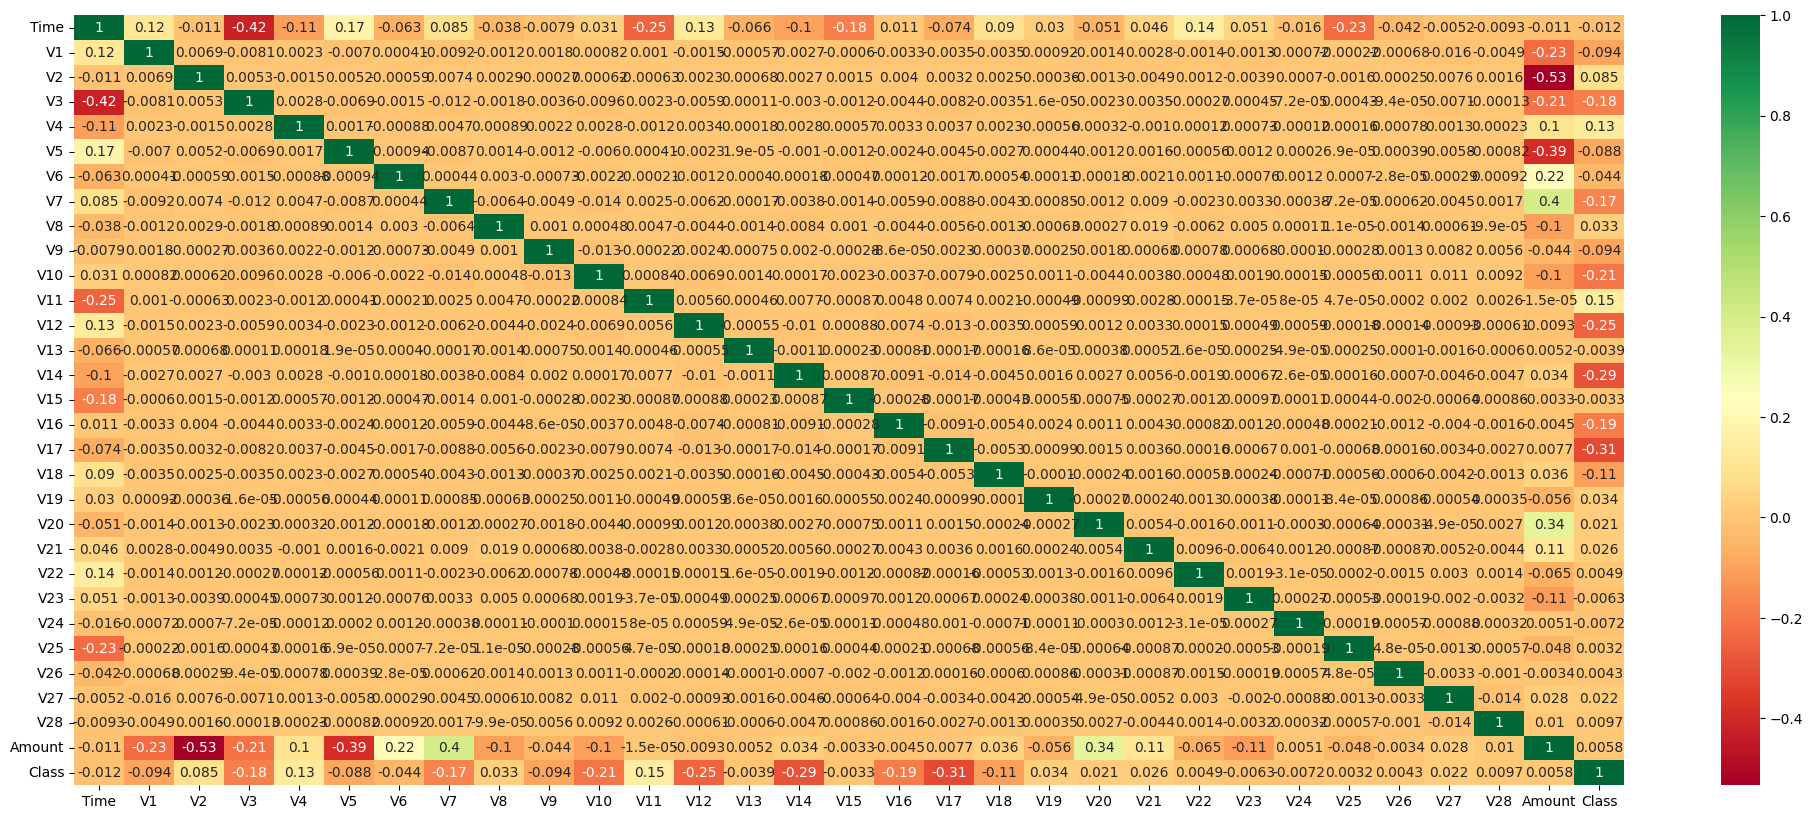

In [22]:
plt.figure(figsize=(25,10))
sg=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

# ⚙️ Data Preprocessing ⚙️

In [23]:
#Scaling of data and removing time column
scaler=StandardScaler()
df['Amount']=scaler.fit_transform(pd.DataFrame(df['Amount']))

df.drop('Time',inplace=True,axis=1)


Code for Model Evaluation

In [24]:
def evaluate_model(X_train,X_test,y_train,y_test,models):
  score={}
  for i in range(len(models)):
    clf=list(models.values())[i]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    print(list(models.keys())[i])
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(accuracy_score(y_test,pred))
    score[list(models.keys())[i]]=accuracy_score(y_test,pred)

  return score

# **UNDER SAMPLING**

In [25]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [26]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]

In [27]:
normal.shape,fraud.shape

((283253, 30), (473, 30))

In [28]:
fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
534,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353327,1
616,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.759301,1
4886,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.604864,1
6072,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117703,1
6293,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278813,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.204187,1
279090,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350292,1
279096,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042263,1
280081,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.625112,1


In [29]:
normal

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [30]:
normal=normal.sample(473)

In [31]:
df_under_sample=pd.concat([normal,fraud],axis=0,ignore_index=True)

In [32]:
df_under_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.157632,-0.173149,2.289120,-0.285431,-1.208962,0.490668,-0.819183,0.325567,-0.961559,0.596354,...,0.251729,0.779474,-0.155791,0.039613,-0.342128,0.019771,0.179625,0.123774,-0.261873,0
1,-0.336259,-0.747120,2.203089,-1.678142,-1.928974,1.145453,-2.413934,-2.303845,-1.202593,-0.222800,...,-1.726905,-0.212426,-0.141674,0.090238,1.275752,-0.173793,0.084767,0.175180,-0.225531,0
2,1.128700,-0.231848,0.472734,0.852938,0.115705,1.541214,-0.718338,0.448091,0.550084,0.026477,...,0.113668,0.429442,-0.319613,-1.676710,0.623683,-0.127780,0.071719,0.011776,-0.178606,0
3,-2.281252,1.003925,0.468409,-1.409173,-0.481244,-0.414422,-0.519634,1.166245,0.132580,-0.252749,...,-0.027087,-0.250613,-0.068690,-0.309297,-0.338359,0.755344,0.112827,0.167382,-0.282759,0
4,0.053959,0.421442,1.302639,-0.503462,-0.064292,-0.424068,0.455838,-0.258315,0.930146,-0.534679,...,0.231059,1.012010,-0.199547,0.006392,-0.368775,-0.328250,-0.174617,-0.170078,-0.313431,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.204187,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350292,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042263,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.625112,1


In [33]:
X_ds=df_under_sample.drop('Class',axis=1)
y_ds=df_under_sample['Class']

In [34]:
X_train_ds,X_test_ds,y_train_ds,y_test_ds=train_test_split(X_ds,y_ds,test_size=.25,random_state=69)

In [35]:
models={
    "Logistic Regression":LogisticRegression(random_state=69),
    "Decision Tree Classifier":DecisionTreeClassifier(random_state=69),
    "Random Forest Classifier": RandomForestClassifier(random_state=69)
}

In [36]:
evaluate_model(X_train_ds,X_test_ds,y_train_ds,y_test_ds,models)

Logistic Regression
[[114   3]
 [ 14 106]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       117
           1       0.97      0.88      0.93       120

    accuracy                           0.93       237
   macro avg       0.93      0.93      0.93       237
weighted avg       0.93      0.93      0.93       237

0.9282700421940928
Decision Tree Classifier
[[100  17]
 [ 12 108]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       117
           1       0.86      0.90      0.88       120

    accuracy                           0.88       237
   macro avg       0.88      0.88      0.88       237
weighted avg       0.88      0.88      0.88       237

0.8776371308016878
Random Forest Classifier
[[112   5]
 [ 12 108]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       117
           1       0.96      0.90      0.93       120

    a

{'Logistic Regression': 0.9282700421940928,
 'Decision Tree Classifier': 0.8776371308016878,
 'Random Forest Classifier': 0.9282700421940928}

We can observe that Random Forest Classifier is giving best accuracy(94.5%) among all of them

# OVER SAMPLING

In [37]:
!pip install imbalanced-learn

In [38]:
X=df.drop('Class',axis=1)
y=df['Class']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=69)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [41]:
X_train_resampled.shape,y_train_resampled.shape

((453194, 29), (453194,))

In [42]:
y_train_resampled.value_counts()

0    226597
1    226597
Name: Class, dtype: int64

In [43]:
models={
    "Logistic Regression":LogisticRegression(random_state=69),
    "Decision Tree Classifier":DecisionTreeClassifier(max_depth=3,random_state=69),
    "Random Forest Classifier": RandomForestClassifier(max_depth=3,random_state=69)
}

In [44]:
evaluate_model(X_train_resampled,X_test,y_train_resampled,y_test,models)

Logistic Regression
[[55294  1362]
 [   10    80]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.89      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746

0.9758220843759913
Decision Tree Classifier
[[52309  4347]
 [    8    82]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56656
           1       0.02      0.91      0.04        90

    accuracy                           0.92     56746
   macro avg       0.51      0.92      0.50     56746
weighted avg       1.00      0.92      0.96     56746

0.9232545025200014
Random Forest Classifier
[[56350   306]
 [   15    75]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.20      0.83   

{'Logistic Regression': 0.9758220843759913,
 'Decision Tree Classifier': 0.9232545025200014,
 'Random Forest Classifier': 0.994343213618581}

In Over sampling RandomForestClassifier performs well accuracy score (99.44%) among all of them

# **Result**

As we observed that the Output Data is Highly imbalanced so we used 2 techniques to balanced the data UNDER Sampling and OVER Sampling

1.   **UNDER Sampling** : In this we randomly select 473 non fraud cases and train our model and we got that RandomForestClassifier perfoms best with **Accuracy  94%.**
2.   **OVER Sampling** : In this we used SMOTE technique to genrate fraud cases same as non fraud and train our model and we got that again RandomForestClassiifier performs really well among others with **Accuraccy 99.44%**



In [ ]:
|